In [1]:
from report_utils import preprocess_results
import pandas as pd
import os

folder = 'classicalLunarLander-v2'
episodes, config = preprocess_results(folder)

os.makedirs('plots', exist_ok=True)

## Boxplots

In [2]:
import numpy as np
import matplotlib.pyplot as plt

episodes['number_of_weights_grouped'] = pd.cut(episodes['number_of_weights'],
                                       bins=[0, 1000, 10000, 100000],
                                       labels=['<1000', '1000-10000', '>10000'])

best_episodes = episodes.groupby(['trial_id', 'episode']).agg({'evaluation_score': 'mean'}).reset_index()
best_episodes = best_episodes.groupby(['trial_id']).agg({'evaluation_score': 'max'}).reset_index()
best_episodes = pd.merge(best_episodes, episodes, on=['trial_id', 'evaluation_score'], how='left')

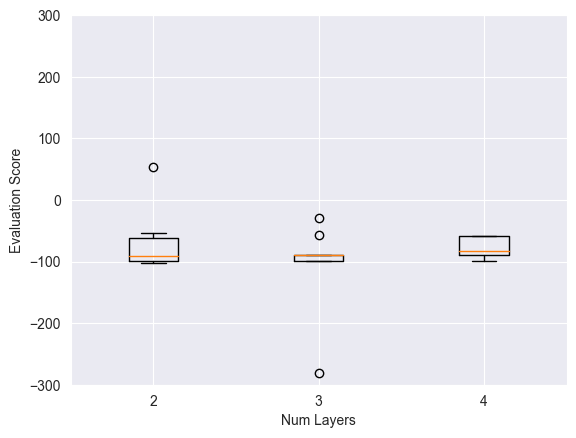

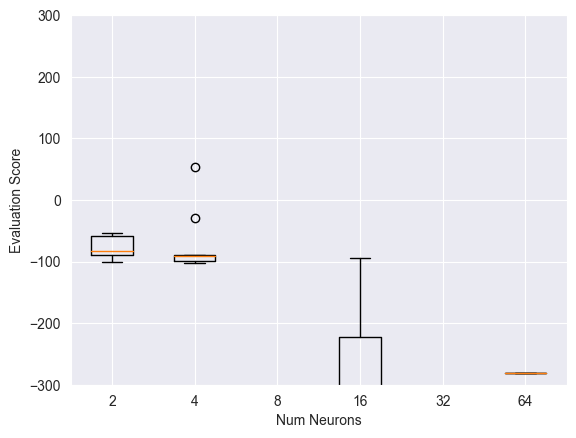

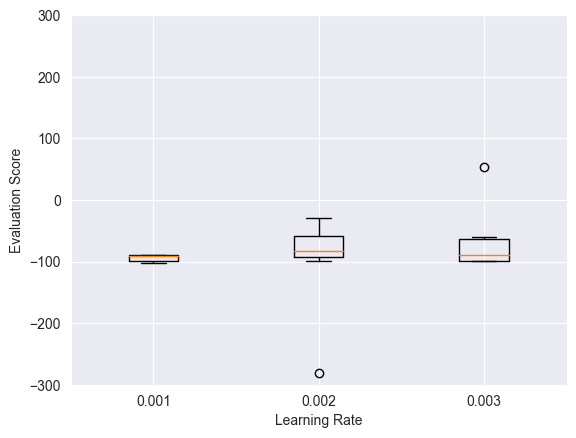

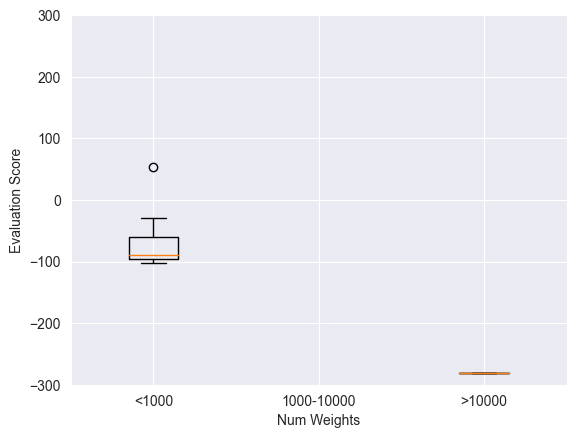

In [3]:

#group number of weights into 3 buckets of less than 1000, between 1000 and 10000, and greater than 10000

# List of hyperparameters and their unique values
hyperparameters = [
    ('Num Layers', 'layers', np.sort(episodes['layers'].unique())),
    ('Num Neurons', 'neurons', np.sort(episodes['neurons'].unique())),
    ('Learning Rate', 'learning_rate', np.sort(episodes['learning_rate'].unique())),
    ('Num Weights', 'number_of_weights_grouped', ['<1000', '1000-10000', '>10000']),
]

# Create individual box plots for each hyperparameter configuration
for title, column, values in hyperparameters:
    fig, ax = plt.subplots()
    ax.boxplot([best_episodes[best_episodes[column] == v]['evaluation_score'] for v in values], whis=2)
    ax.set_xticklabels(values)
    ax.set_xlabel(title)
    ax.set_ylabel('Evaluation Score')
    if folder == 'classicalLunarLander-v2':
        ax.set_ylim(-300, 300)
    else :
        ax.set_ylim(0, 505)

    # Save the figure with a reasonable name starting with 'classical'
    fig.savefig(f'plots\\{folder}_{column}_sensitivity.png')
    plt.show()
    plt.close(fig)

## Heatmaps

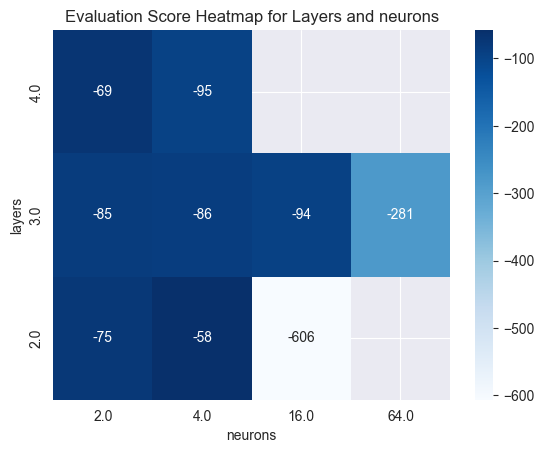

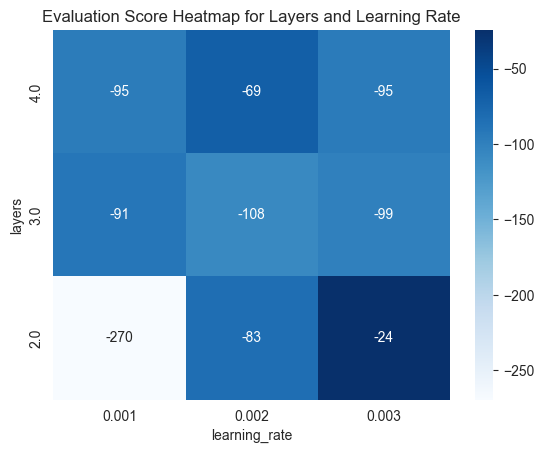

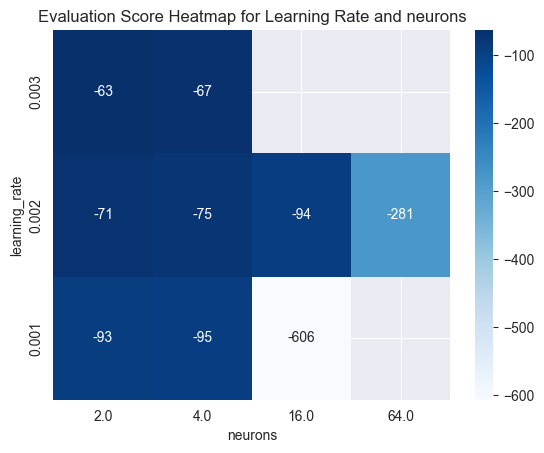

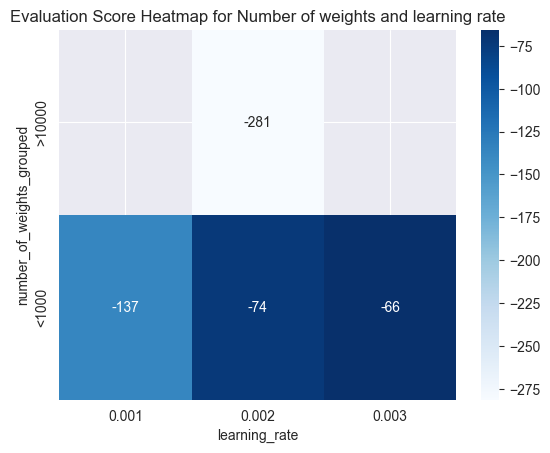

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# List of heatmap configurations
heatmaps = [
    ('Layers and neurons', 'layers', 'neurons', 'layers_neurons'),
    ('Layers and Learning Rate', 'layers', 'learning_rate', 'layers_lr'),
    ('Learning Rate and neurons', 'learning_rate', 'neurons', 'lr_neurons'),
    ('Number of weights and learning rate', 'number_of_weights_grouped', 'learning_rate', 'weights_lr')
]

for title, row_col, col_col, filename in heatmaps:
    # Create a pivot table
    pivot_table = best_episodes.pivot_table(index=row_col, columns=col_col, values='evaluation_score', aggfunc='mean')
    # pivot_table = pivot_table.applymap(lambda x: np.clip(x, -300, 300))

    # Create a heatmap
    fig, ax = plt.subplots()
    sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.0f', ax=ax).invert_yaxis()
    ax.set_title(f'Evaluation Score Heatmap for {title}')

    # Save the figure with a reasonable name starting with 'classical'
    fig.savefig(f'plots\\{folder}_{filename}_heatmap.png')
    plt.show()
    plt.close(fig)

## Scatterplots

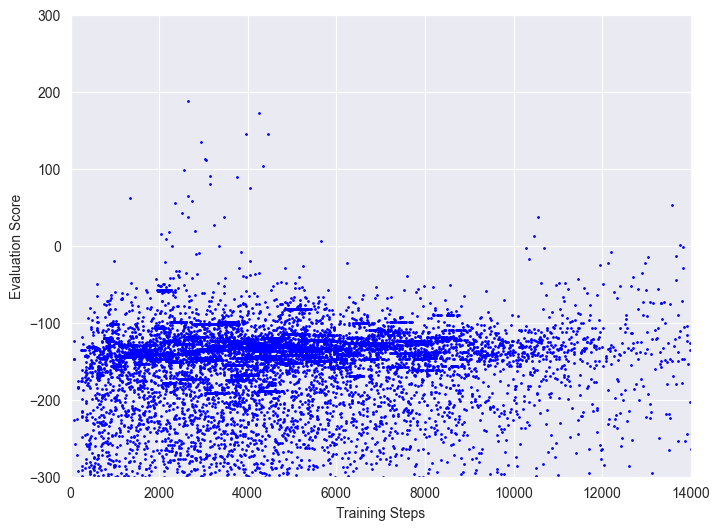

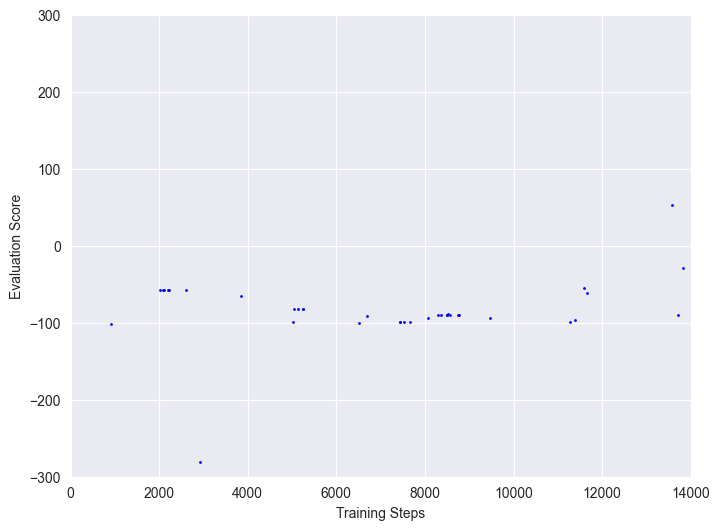

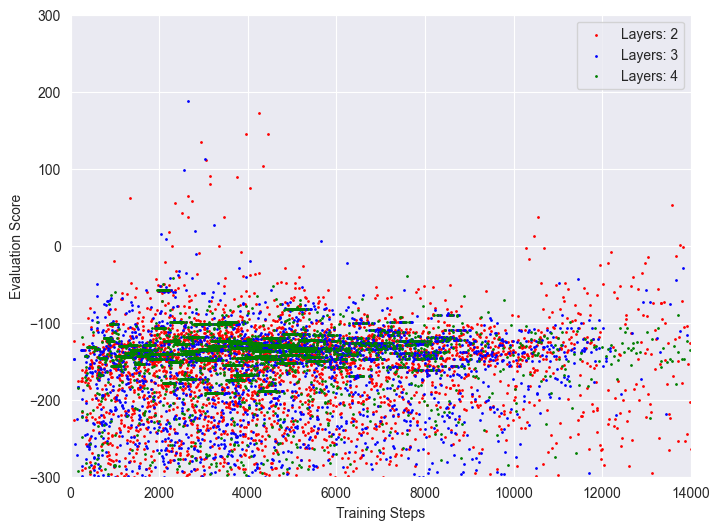

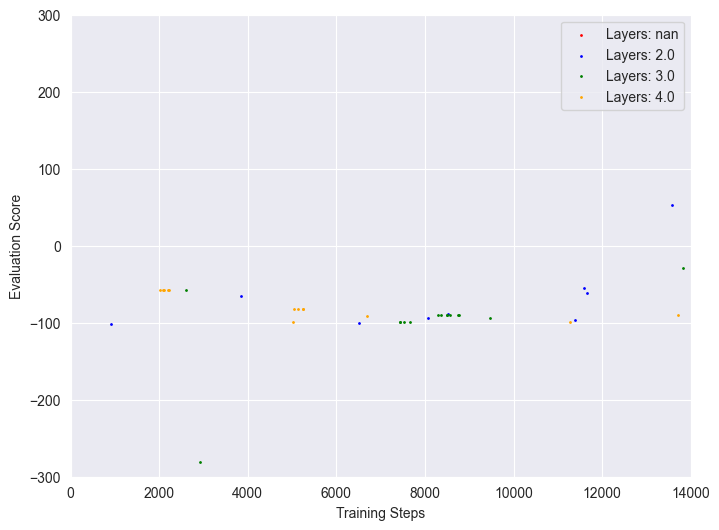

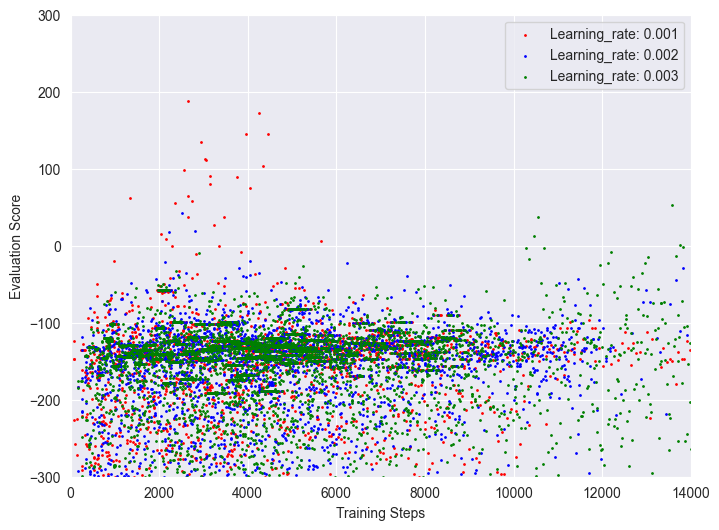

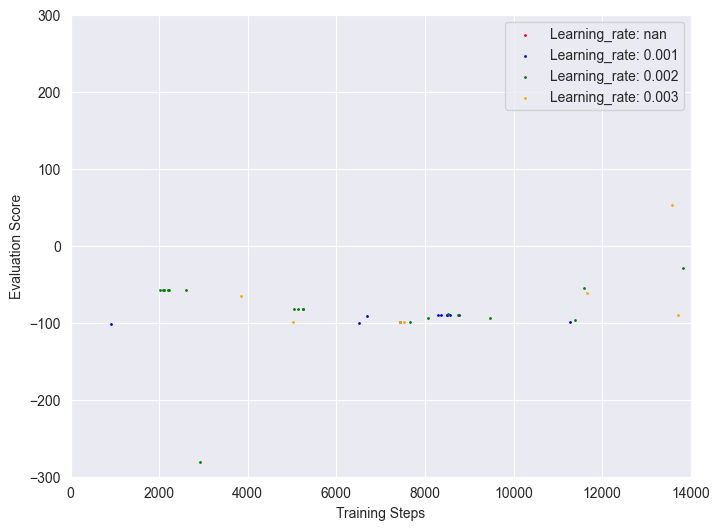

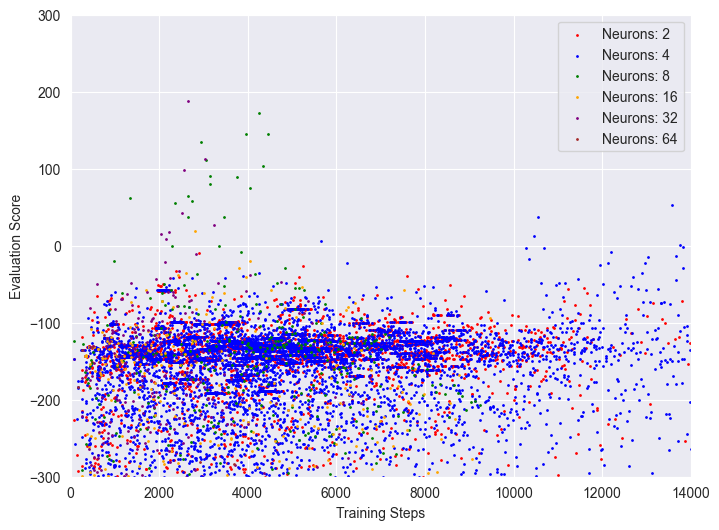

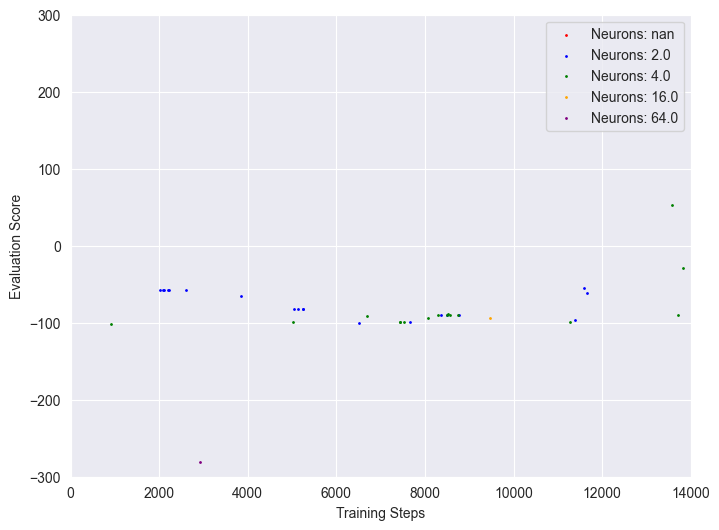

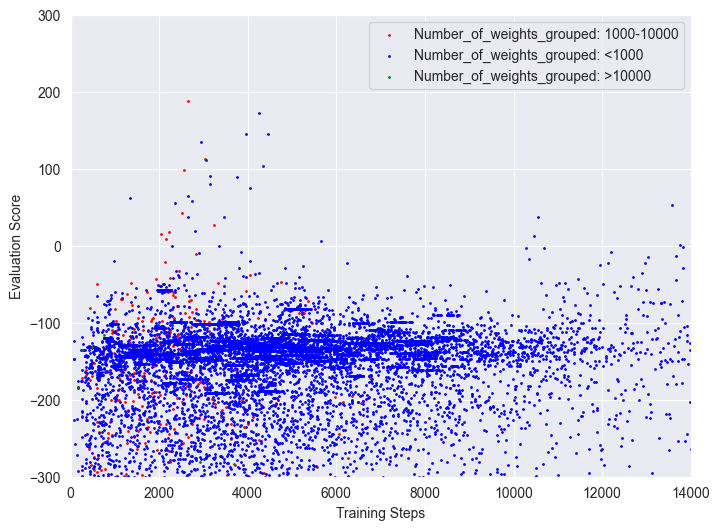

TypeError: '<' not supported between instances of 'str' and 'float'

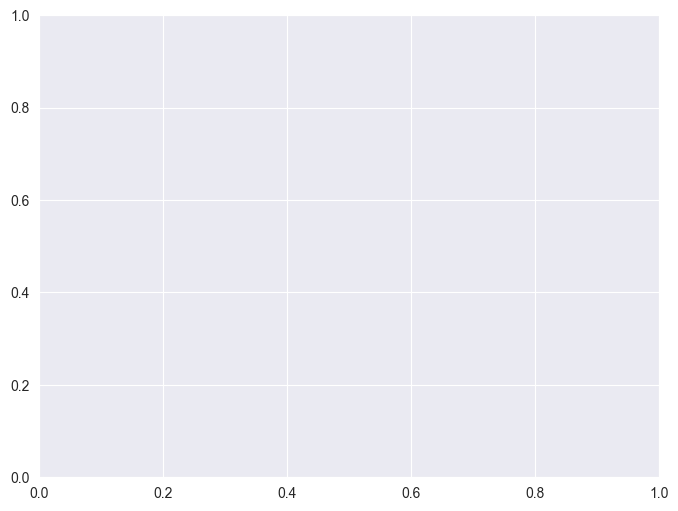

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_episodes(df, title, filename, grouping):

    fig, ax = plt.subplots(figsize=(8, 6))

    if grouping == 'none':
        ax.scatter(df['training_steps_cumsum'], df['evaluation_score'], s=1, color='blue')
    else:
        unique_values = sorted(df[grouping].unique())
        if grouping == 'number_of_weights':
            cmap = mcolors.LinearSegmentedColormap.from_list(['red', 'blue', 'green'])
            colors = [cmap(float(value) / max(unique_values)) for value in unique_values]
        else:
            colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

        for value, color in zip(unique_values, colors):
            scatter_data = df[df[grouping] == value]
            ax.scatter(scatter_data['training_steps_cumsum'], scatter_data['evaluation_score'], s=1, color=color,
                       label=f'{grouping.capitalize()}: {value}')

    ax.set_xlabel('Training Steps')
    ax.set_ylabel('Evaluation Score')
    ax.set_xlim(0, 14000)
    if folder == 'classicalLunarLander-v2':
        ax.set_ylim(-300, 300)

    if grouping != 'none':
        ax.legend()

    plt.savefig(filename, dpi=300)
    plt.show()


# Call the function with the 'episodes' dataframe without grouping
plot_episodes(episodes, 'Evaluation Score vs Training Steps (All Episodes)',
              f'plots\\{folder}_all_episodes_no_grouping.png', 'none')

# Call the function with the 'best_episodes' dataframe without grouping
plot_episodes(best_episodes, 'Evaluation Score vs Training Steps (Best Episodes)',
              f'plots\\{folder}_best_episodes_no_grouping.png', 'none')

# Call the function with the 'episodes' dataframe for layers
plot_episodes(episodes, 'Evaluation Score vs Training Steps (All Episodes, Layers)',
              f'plots\\{folder}_layers_comparison_all_episodes.png', 'layers')

# Call the function with the 'best_episodes' dataframe for layers
plot_episodes(best_episodes, 'Evaluation Score vs Training Steps (Best Episodes, Layers)',
              f'plots\\{folder}_layers_comparison_best_episodes.png', 'layers')

# Call the function with the 'episodes' dataframe for learning rate
plot_episodes(episodes, 'Evaluation Score vs Training Steps (All Episodes, Learning Rate)',
              f'plots\\{folder}_learning_rate_comparison_all_episodes.png', 'learning_rate')

# Call the function with the 'best_episodes' dataframe for learning rate
plot_episodes(best_episodes, 'Evaluation Score vs Training Steps (Best Episodes, Learning Rate)',
              f'plots\\{folder}_learning_rate_comparison_best_episodes.png', 'learning_rate')

# Call the function with the 'episodes' dataframe for neurons
plot_episodes(episodes, 'Evaluation Score vs Training Steps (All Episodes, Neurons)',
              f'plots\\{folder}_neurons_comparison_all_episodes.png', 'neurons')

# Call the function with the 'best_episodes' dataframe for neurons
plot_episodes(best_episodes, 'Evaluation Score vs Training Steps (Best Episodes, Neurons)',
              f'plots\\{folder}_neurons_comparison_best_episodes.png', 'neurons')

# Call the function with the 'episodes' dataframe for number of weights
plot_episodes(episodes, 'Evaluation Score vs Training Steps (All Episodes, Number of Weights)',
              f'plots\\{folder}_weights_grouped_comparison_all_episodes.png', 'number_of_weights_grouped')

# Call the function with the 'best_episodes' dataframe for number of weights
plot_episodes(best_episodes, 'Evaluation Score vs Training Steps (Best Episodes, Number of Weights)',
              f'plots\\{folder}_weights_grouped_comparison_best_episodes.png', 'number_of_weights_grouped')

